# Roller Coaster
***

## Project Requirements

Load each csv into a DataFrame and inspect it to gain familiarity with the data.

In [22]:
# 1 
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# display charts correctly
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['figure.dpi'] = 80

In [21]:
# load rankings data
wood_rc = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv') # rc - means roller coaster
print(wood_rc.shape)
# load rankings data
steel_rc = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
print(steel_rc.shape)


(180, 8)
(180, 8)


In [5]:
wood_rc.head()

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013
1,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1302,2013
2,3,Phoenix,Knoebels Amusement Resort,"Elysburg, Pa.",Dinn/PTC-Schmeck,1985,1088,2013
3,4,The Voyage,Holiday World,"Santa Claus, Ind.",Gravity Group,2006,1086,2013
4,5,Thunderhead,Dollywood,"Pigeon Forge, Tenn.",GCII,2004,923,2013


In [6]:
steel_rc.head()

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013
2,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,598,2013
3,4,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,596,2013
4,5,Apollo’s Chariot,Busch Gardens Williamsburg,"Williamsburg, Va.",B&M,1999,542,2013


The Golden Ticket Awards datasets include the following columns:

- Rank: rank of the roller coaster in a given year
- Name: name of the roller coaster
- Park: amusement park where the roller coaster is located
- Location: location of the amusement park where the roller coaster is located
- Supplier: manufacturer of the roller coaster
- Year Built: year the roller coaster was built
- Points: points scored in a given year’s ranking
- Year of Rank: year the roller coaster achieved a given rank

Some questions that interest:
- How many roller coasters are included in each ranking dataset?
- How many different roller coaster suppliers are included in the rankings?
- Do some years include more rankings than other years?

In [10]:
print(f"There are {wood_rc['Name'].nunique()} unique wooden roller coasters.")
print(f"There are {steel_rc['Name'].nunique()} unique steel roller coasters.")

There are 61 unique wooden roller coasters.
There are 63 unique steel roller coasters.


In [12]:
print(f"There are {wood_rc['Supplier'].nunique() + steel_rc['Supplier'].nunique()} unique roller coasters suppliers.")

There are 47 unique roller coasters suppliers.


In [18]:
print('The number of ratings per year for wooden roller coasters:')
wood_rc.groupby('Year of Rank')['Rank'].count().reset_index(name='number of ratings')

The number of ratings per year for wooden roller coasters:


,Year of Rank,number of ratings
0,2013,10
1,2014,10
2,2015,10
3,2016,50
4,2017,50
5,2018,50


In [19]:
print('The number of ratings per year for steel roller coasters:')
steel_rc.groupby('Year of Rank')['Rank'].count().reset_index(name='number of ratings')

The number of ratings per year for steel roller coasters:


,Year of Rank,number of ratings
0,2013,10
1,2014,10
2,2015,10
3,2016,50
4,2017,50
5,2018,50


2. Write a function that will plot the ranking of a given roller coaster over time as a line. Your function should take a roller coaster's name and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with `"El Toro"` as the roller coaster name and the wood ranking DataFrame. What issue do you notice? Update your function with an additional argument to alleviate the problem, and retest your function.

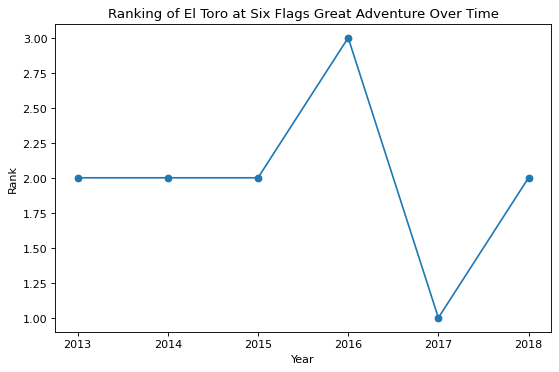

In [80]:
# 2
# Create a function to plot rankings over time for 1 roller coaster
def plot_rc_rankings(data, rc_name, park_name):
    if rc_name in data['Name'].values:
        rc_data = data[(data['Name'] == rc_name)]
        if park_name in rc_data['Park'].values:
            rc_data = rc_data[rc_data['Park'] == park_name]
            plt.figure()
            plt.plot(rc_data['Year of Rank'], rc_data['Rank'], marker='o')
            plt.title(f'Ranking of {rc_name} at {park_name} Over Time')
            plt.xlabel('Year')
            plt.ylabel('Rank')            
            plt.show()
        else:
            print(f"{rc_name} is not located in {park_name}.")    
            return
    else:
        print(f"{rc_name} not found in the dataset.")
        return

# Create a plot of El Toro ranking over time
plot_rc_rankings(wood_rc, 'El Toro', 'Six Flags Great Adventure')

3. Write a function that will plot the ranking of two given roller coasters over time as lines. Your function should take both roller coasters' names and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with `"El Toro"` as one roller coaster name, `"Boulder Dash"` as the other roller coaster name, and the wood ranking DataFrame. What issue do you notice? Update your function with two additional arguments to alleviate the problem, and retest your function.

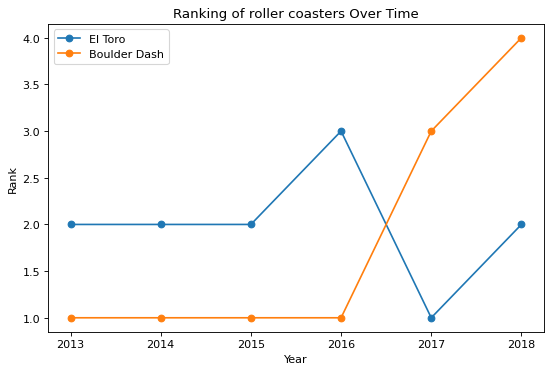

In [ ]:
# 3
# Create a function to plot rankings over time for 2 roller coasters
def plot_two_rc_rankings(data, rc_name1, park_name1, rc_name2, park_name2):
    if (rc_name1 in data['Name'].values) & (rc_name2 in data['Name'].values):
        filt_name = data['Name'].isin([rc_name1, rc_name2]) # mask for filtering roller coasters by names
        rc_data = data.loc[filt_name, :]
        if (park_name1 in rc_data['Park'].values) & (park_name2 in rc_data['Park'].values):
            filt_park = rc_data['Park'].isin([park_name1, park_name2]) # mask for filtering roller coasters by parks
            rc_data = rc_data.loc[filt_park, :]
            
            filt_rc1 = rc_data['Name'] == rc_name1
            rc_data1 = rc_data.loc[filt_rc1, :] # filter data for the first roller coaster
            filt_rc2 = rc_data['Name'] == rc_name2
            rc_data2 = rc_data.loc[filt_rc2, :] # filter data for the second roller coaster

            plt.figure()
            plt.plot(rc_data1['Year of Rank'], rc_data1['Rank'], marker='o', label=rc_name1) # plot for the first roller coaster
            plt.plot(rc_data2['Year of Rank'], rc_data2['Rank'], marker='o', label=rc_name2) # plot for the second roller coaster
            plt.title(f'Ranking of roller coasters Over Time')
            plt.xlabel('Year')
            plt.ylabel('Rank')
            plt.legend()
            plt.show()
        else:
            print("One or both roller coasters not found in the specified parks.")    
            return
    else:
        print("One or both roller coasters not found in the dataset.")
        return
# Create a plot of El Toro and Boulder Dash roller coasters
plot_two_rc_rankings(wood_rc, 'El Toro', 'Six Flags Great Adventure', 'Boulder Dash', 'Lake Compounce')

4. Write a function that will plot the ranking of the top `n` ranked roller coasters over time as lines. Your function should take a number `n` and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   For example, if `n == 5`, your function should plot a line for each roller coaster that has a rank of `5` or lower.
   
   Call your function with a value of `n` and either the wood ranking or steel ranking DataFrame.

In [4]:
# 4
# Create a function to plot top n rankings over time

# Create a plot of top n rankings over time


5. Now that you've visualized rankings over time, let's dive into the actual statistics of roller coasters themselves. [Captain Coaster](https://captaincoaster.com/en/) is a popular site for recording roller coaster information. Data on all roller coasters documented on Captain Coaster has been accessed through its API and stored in `roller_coasters.csv`. Load the data from the csv into a DataFrame and inspect it to gain familiarity with the data.

In [5]:
# 5
# load roller coaster data


6. Write a function that plots a histogram of any numeric column of the roller coaster DataFrame. Your function should take a DataFrame and a column name for which a histogram should be constructed as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame and one of the column names.

In [6]:
# 6
# Create a function to plot histogram of column values

# Create histogram of roller coaster speed

# Create histogram of roller coaster length

# Create histogram of roller coaster number of inversions

# Create a function to plot histogram of height values

# Create a histogram of roller coaster height


7. Write a function that creates a bar chart showing the number of inversions for each roller coaster at an amusement park. Your function should take the roller coaster DataFrame and an amusement park name as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame and amusement park name.

In [7]:
# 7
# Create a function to plot inversions by coaster at park

# Create barplot of inversions by roller coasters


8. Write a function that creates a pie chart that compares the number of operating roller coasters (`'status.operating'`) to the number of closed roller coasters (`'status.closed.definitely'`). Your function should take the roller coaster DataFrame as an argument. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame.

In [8]:
# 8
# Create a function to plot a pie chart of status.operating

# Create pie chart of roller coasters


9. `.scatter()` is another useful function in matplotlib that you might not have seen before. `.scatter()` produces a scatter plot, which is similar to `.plot()` in that it plots points on a figure. `.scatter()`, however, does not connect the points with a line. This allows you to analyze the relationship between two variables. Find [`.scatter()`'s documentation here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

   Write a function that creates a scatter plot of two numeric columns of the roller coaster DataFrame. Your function should take the roller coaster DataFrame and two-column names as arguments. Make sure to include informative labels that describe your visualization.
   
   Call your function with the roller coaster DataFrame and two-column names.

In [9]:
# 9
# Create a function to plot scatter of any two columns

# Create a function to plot scatter of speed vs height

# Create a scatter plot of roller coaster height by speed


10. Part of the fun of data analysis and visualization is digging into the data you have and answering questions that come to your mind.

    Some questions you might want to answer with the datasets provided include:
    - What roller coaster seating type is most popular? And do different seating types result in higher/faster/longer roller coasters?
    - Do roller coaster manufactures have any specialties (do they focus on speed, height, seating type, or inversions)?
    - Do amusement parks have any specialties?
    
    What visualizations can you create that answer these questions, and any others that come to you? Share the questions you ask and the accompanying visualizations you create on the Codecademy forums.